#### Lending Club Case Study

Problem Statement:

A consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

Business Objectives:
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

#### Data Set Information 

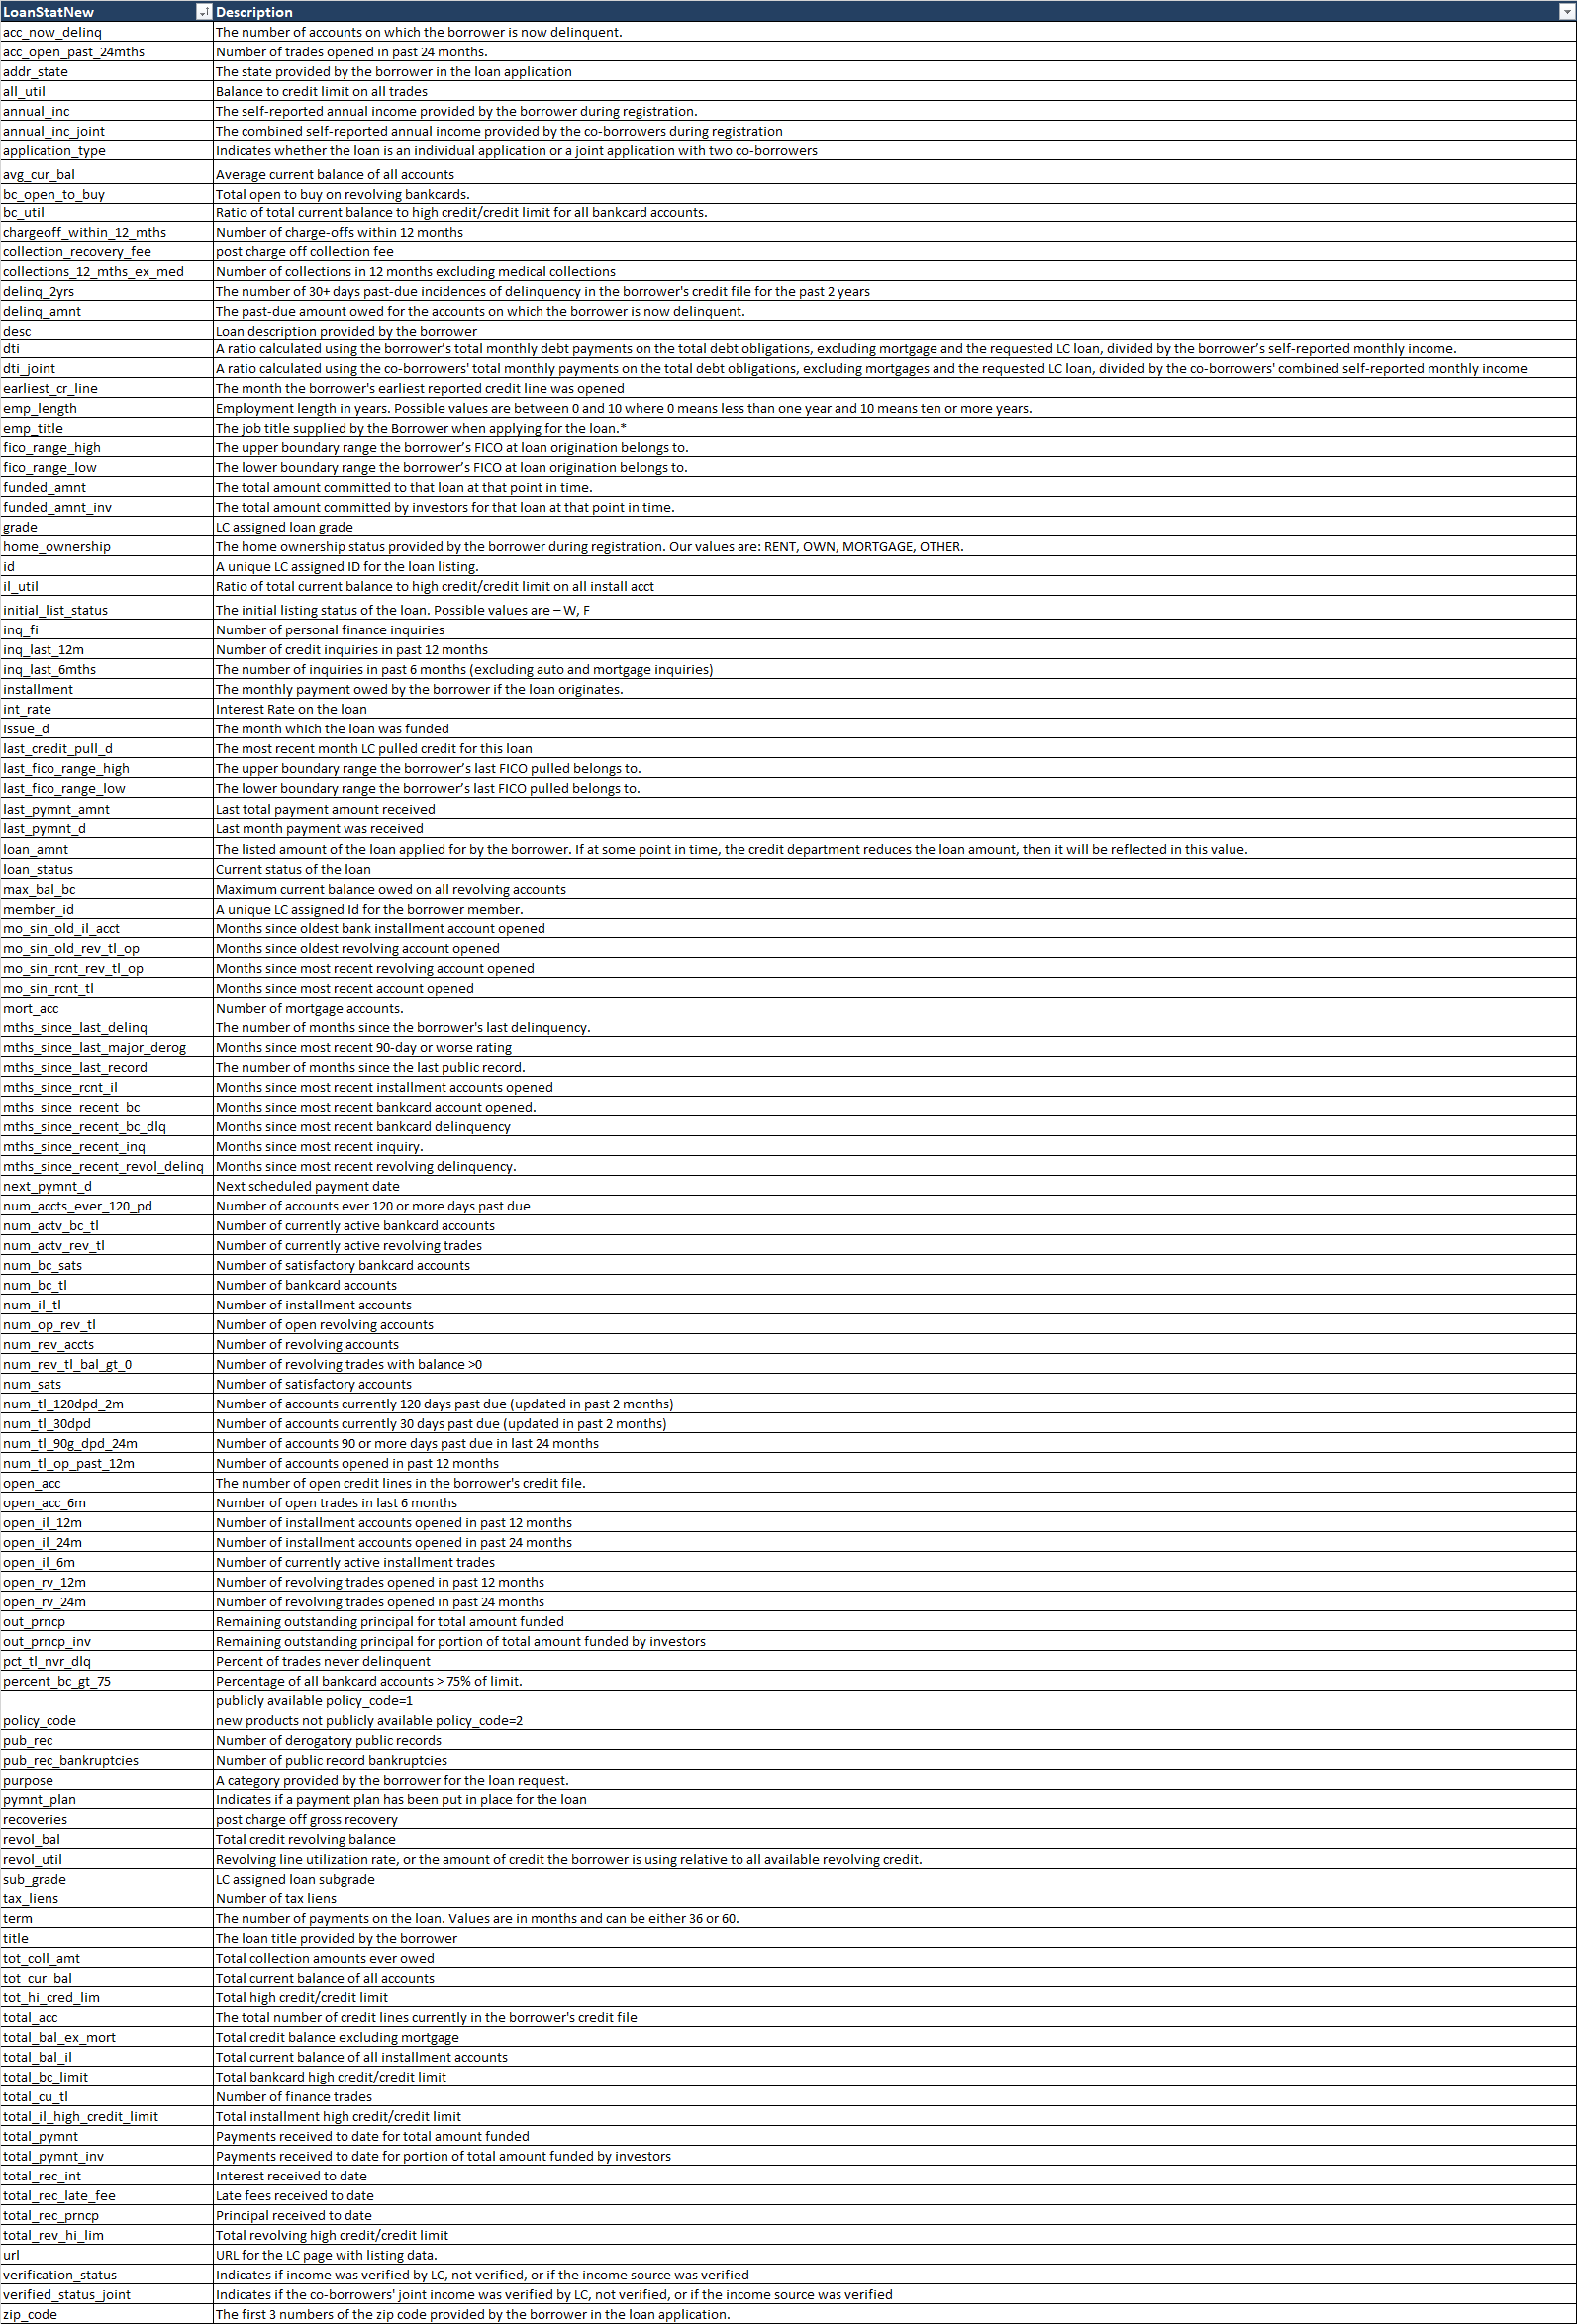

#### Import the necessary libraries and Load the CSV file

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings('ignore')

In [137]:
# Read csv file 

df = pd.read_csv('loan.csv')

### Data Quality Checks

In [139]:
# Understand the data in the csv file 

print(df.describe())
print(df.shape)
print(df.info())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

Total Rows = 39717
Columns = 111

## <font color='green'>Data Quality Issues</font>

In [144]:
# Find the number of rows with NUll values 

print(df.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


## <font color='green'>Data cleaning and manipulation</font>

In [147]:
# Delete columns with all NULL values 

df2 = df.dropna(axis=1, how='all')

In [149]:
# After deleting checking the remaining columns with more NULL data. Remaining columns that are relevant do not have more NULL data. 

print(df2.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [151]:
#Number of columns after the columns are dropped Delete columns with all Null values

print(df2.shape)
print(df2.describe())

(39717, 57)
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.1700

In [153]:
#Analyse columns with max and min same. This indicates that the values is constant is not required for analysis

print(df2['collections_12_mths_ex_med'].unique())
print(df2['policy_code'].unique())
print(df2['acc_now_delinq'].unique())
print(df2['chargeoff_within_12_mths'].unique())
print(df2['delinq_amnt'].unique())
print(df2['tax_liens'].unique())

[ 0. nan]
[1]
[0]
[ 0. nan]
[0]
[ 0. nan]


In [155]:
#Based on the analysis all the below columns can be deleted

df3 = df2.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis = 1)
print(df3.shape)
print(df3.describe())

(39717, 51)
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.1700

In [157]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [159]:
#Analyse the remaining columns for missing values. None of the relevant columns for analysis has significant Null values

df3.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc  

<font color='blue'>Change the column data types</font>

In [162]:
# convert issue date to date format

convert_date = lambda x: datetime.datetime.strptime(x, "%b-%y")

df3['issue_date'] = df3['issue_d'].apply(convert_date)
df3['year'] = df3['issue_date'].dt.year

In [163]:
# Emp_Length replace null values with 0 years

df3['emp_length']= df3['emp_length'].fillna("No Info")


In [166]:
# int_rate convert ot float by removing %
df3['int_rate'] = df3['int_rate'].str.replace('%','').astype(float)
df3['int_rate'].value_counts
df3['int_rate'].dtype

dtype('float64')

In [168]:
# revol_util convert ot float by removing %
df3['revol_util'] = df3['revol_util'].str.replace('%','').astype(float)
print(df3['revol_util'].dtype)
print(df3['revol_util'].value_counts())

float64
revol_util
0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1089, dtype: int64


In [170]:
# Create default column based on loan status
df3['default'] = df3['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0, 'Current': 0})

<font color='blue'>Find the outliers</font>

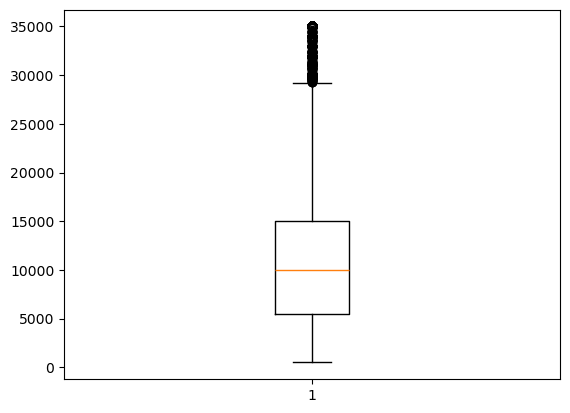

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [173]:
# Create box plot to find the outliers on Loan amount

plt.boxplot(df3['loan_amnt'])
plt.show()
print(df3['loan_amnt'].describe())

In [175]:
# Remove outliers of loan amount above 30000

df4=df3[df3['loan_amnt'] <=30000]
print(df4.shape)

(38889, 54)


## <font color='green'>Data Analysis</font>

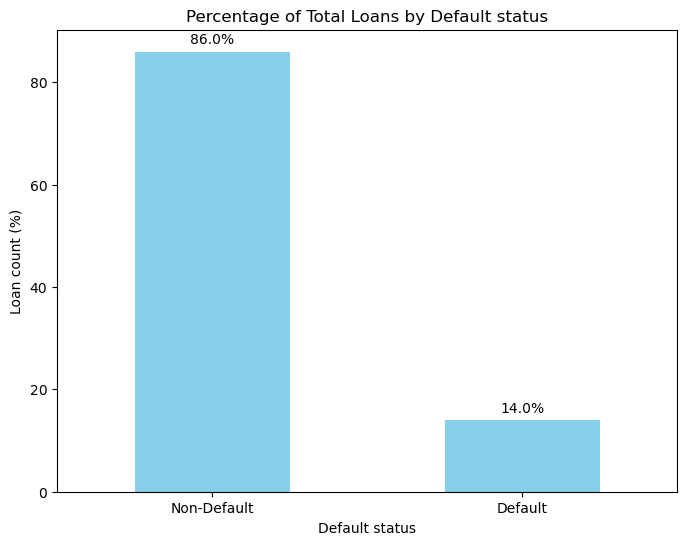

In [178]:
 # Plot a bar chart showing the percentage of the total loans
# Conclusion: 14% of the loans are defaulted

alias_dict = {
    1: 'Default',
    0: 'Non-Default'
}
# Replace the category names with alias names
df4['default_name'] = df4['default'].replace(alias_dict)

# count the occurences of each category
category_counts = df4['default_name'].value_counts()

# Calculate the percentage for each category
category_percentages = (category_counts / category_counts.sum()) * 100

# Create a bar chart using the 'Category' and 'Percentage' columns
ax = category_percentages.plot(kind='bar', color='skyblue', figsize=(8, 6))

# Add labels on top of each bar
for i, value in enumerate(category_percentages):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
    
# Add labels and title
plt.xlabel('Default status')
plt.ylabel('Loan count (%)')
plt.xticks(rotation=0)
plt.title('Percentage of Total Loans by Default status')

# Display the chart
plt.show()

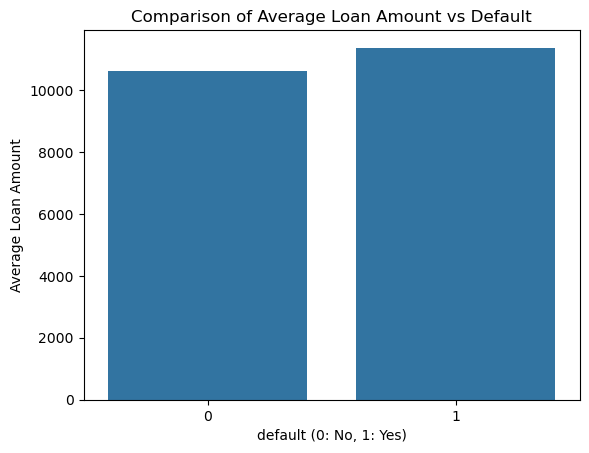

In [180]:
# Average loan amount by Default status
# conclusion 1: Average loan Amount is higher for defaulted loans

# Group by Default status and calculate the average loan amount for each group
LoanAmount_default = df4.groupby('default')['loan_amnt'].mean().reset_index()

# seaborn plot
sns.barplot(x='default', y='loan_amnt', data=LoanAmount_default)

# Add labels and title
plt.xlabel('default (0: No, 1: Yes)')
plt.ylabel('Average Loan Amount')
plt.title('Comparison of Average Loan Amount vs Default')

# Show the plot
plt.show()

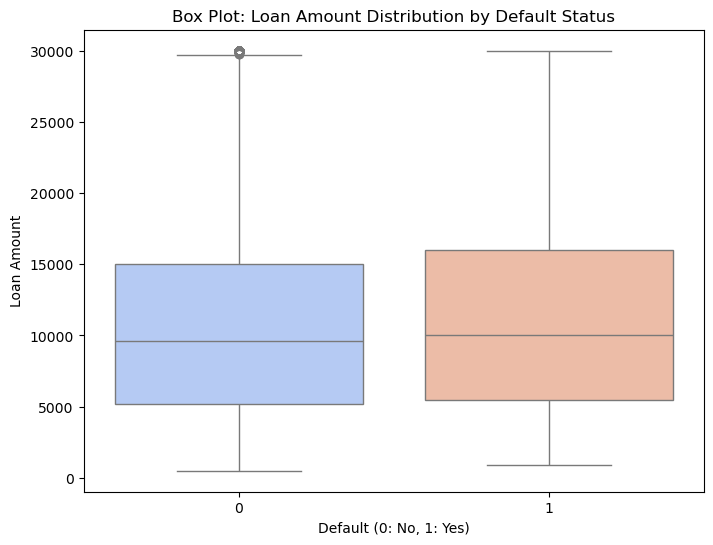

In [182]:
# Average loan amount by Default status
# conclusion 1: Median loan Amount is slightly higher for defaulted loans

# Default status and average loan amount distribution

# Set up the seaborn boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='loan_amnt', data=df4, palette='coolwarm')

# Add labels and title
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Loan Amount')
plt.title('Box Plot: Loan Amount Distribution by Default Status')

# Show the plot
plt.show()

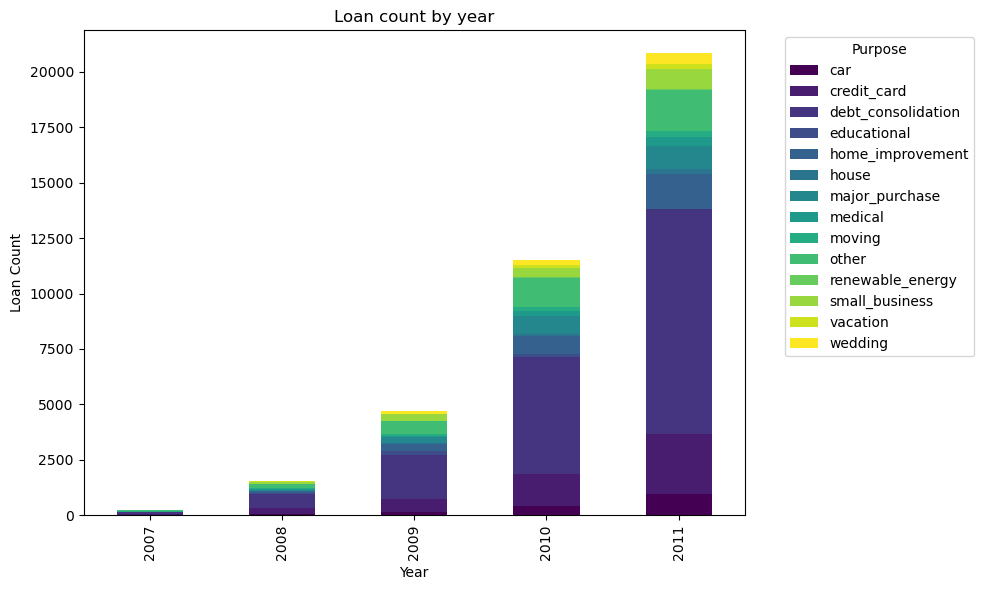

In [183]:
# Creating a crosstab to get counts for loan count by Year
# Conclusion 1: Loans have increased significantly year over year.
# Conclusion 2: Debt consolidation loans have increased year over year and highest in 2011. Credit card loans have also increased in 2011.


cross_tab = pd.crosstab(df4['year'], df4['purpose'])

# Plotting the stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
 
plt.title('Loan count by year')
plt.xlabel('Year')
plt.ylabel('Loan Count')
plt.xticks(rotation=90)
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

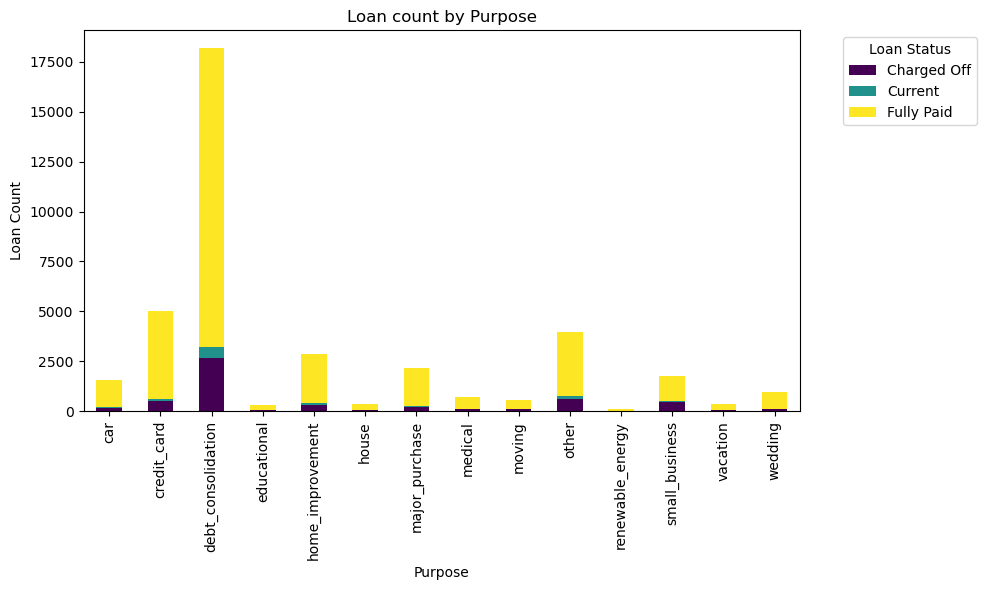

In [185]:
# Creating a crosstab to get counts for loan_status and purpose
# Conclusion: Highest number of loans are for Debt Consolidation, followed by Credit_card, Other and Home Improvement

cross_tab = pd.crosstab(df4['purpose'], df4['loan_status'])

# Plotting the stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
 
plt.title('Loan count by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Loan Count')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

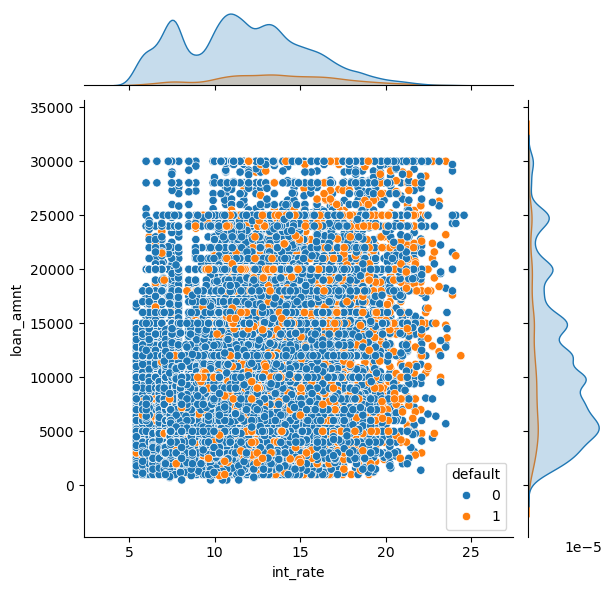

In [186]:
# scatter chart - interest rate vs loan amount across defaults
# Conclusion1: Both interest rate and Loan amount are right skewed i.e lower limits are much lower than the rest
# Conclusion2: Defaults are high above 10% interest rate


sns.jointplot(data=df4, x="int_rate", y="loan_amnt", hue="default")

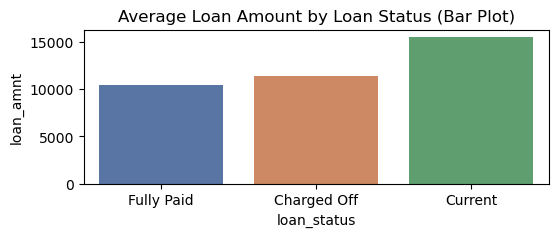

In [188]:
# Average Loan Amount vs Loan status
# conclusion1: Average loan amount is high for current loans followed by charged-off loans

plt.figure(figsize=(6, 2))
sns.barplot(data=df4, x="loan_status", y="loan_amnt", estimator='mean', errorbar=None , hue = 'loan_status', palette="deep")
plt.title("Average Loan Amount by Loan Status (Bar Plot)")
plt.show()

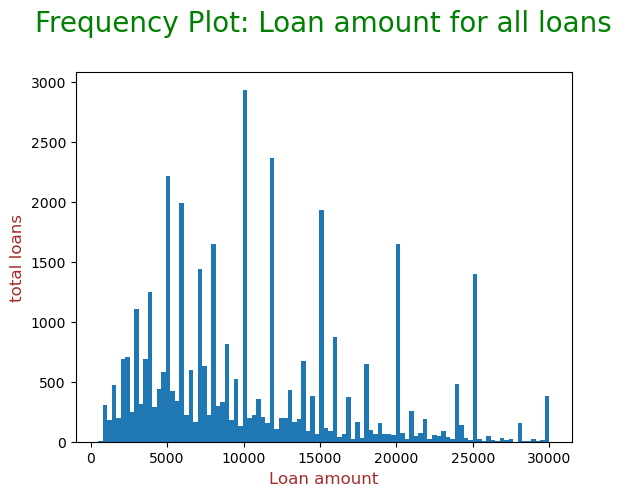

In [190]:
# Average Loan Amount vs Loan status
# conclusion1: Highest numbers of loans are near 10000 and majority of the loans are below 15000

plt.hist(df4["loan_amnt"], bins = 100)

# Adding and formatting title
plt.title("Frequency Plot: Loan amount for all loans\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Loan amount", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("total loans", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

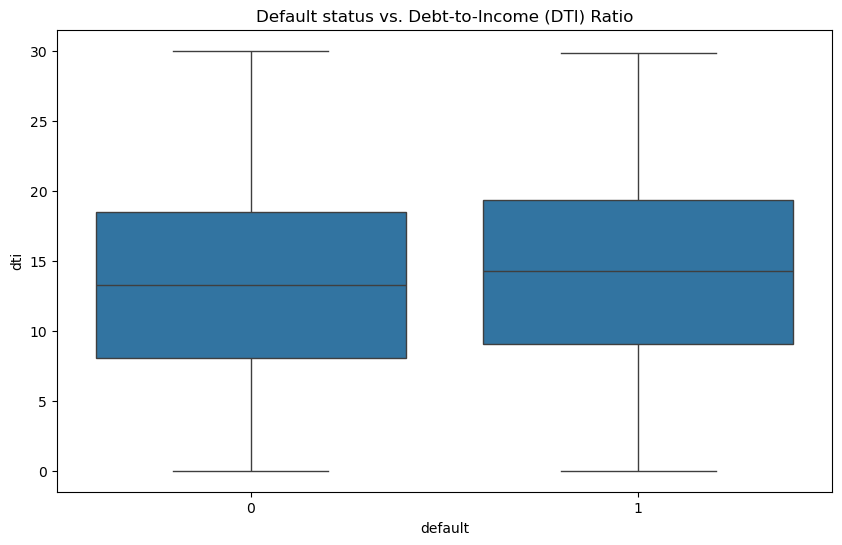

In [191]:
# Default status and Debt-to-Income (DTI) Ratio
# conclusion 1: Median is higher for defaulted loans

plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='dti', data=df4)
plt.title('Default status vs. Debt-to-Income (DTI) Ratio')
plt.show()

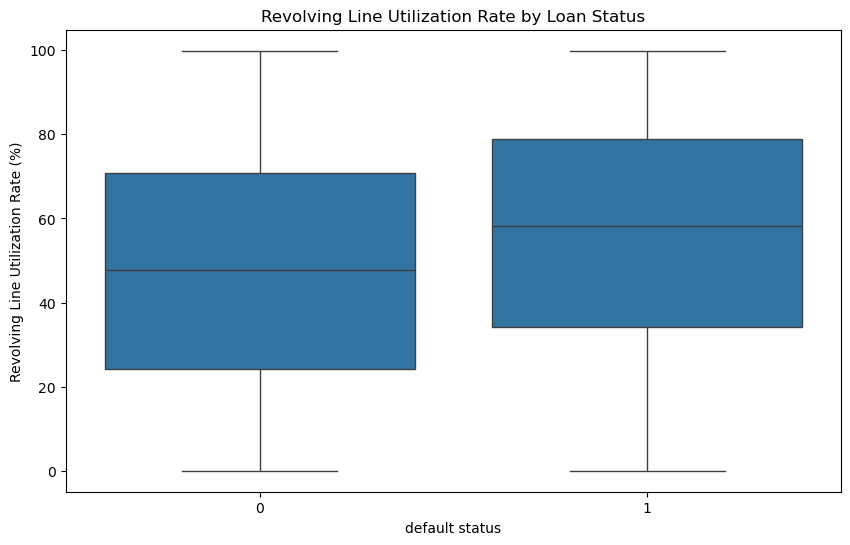

In [192]:
# Default status and Revolving Line Utilization
# conclusion 1: Median is higher for defaulted loans

plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='revol_util', data=df4)
plt.title('Revolving Line Utilization Rate by Loan Status')
plt.xlabel('default status')
plt.ylabel('Revolving Line Utilization Rate (%)')
plt.show()


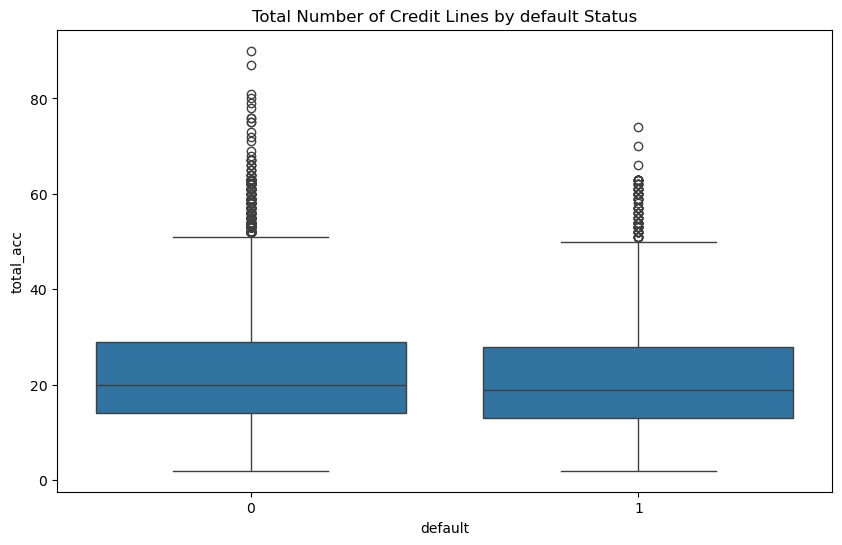

In [193]:
# Default status and Credit lines
# conclusion 1: Median is lower for defaulted loans

plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='total_acc', data=df4)
plt.title('Total Number of Credit Lines by default Status')
plt.xlabel('default')
plt.ylabel('total_acc')
plt.show()

### functions created

In [195]:
# Default percentage by various categorical variables

def default_by_category(x,x_label,title):
    df4['default_perc'] = 100*(df4["default"]/df4.groupby(x)['default'].transform('count'))
    groupdata = round(df4.groupby(x)['default_perc'].sum(),1)
    
    ax = groupdata.plot(kind='bar', title=title,
               ylabel='Default %', xlabel=x_label, figsize=(10, 6))
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.show()

# Default Loans count by various categorical variables

def bar_plot_Group(x, y,x_label,y_label,title):
    temp_df = round(df4.groupby(x)[y].sum(),1)
    ax = temp_df.plot(kind='bar', title=title,
               ylabel=y_label, xlabel=x_label, figsize=(10, 6))
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.show()

### Default Loans count by various categorical variables

#### #1 Default Loans count by Purpose

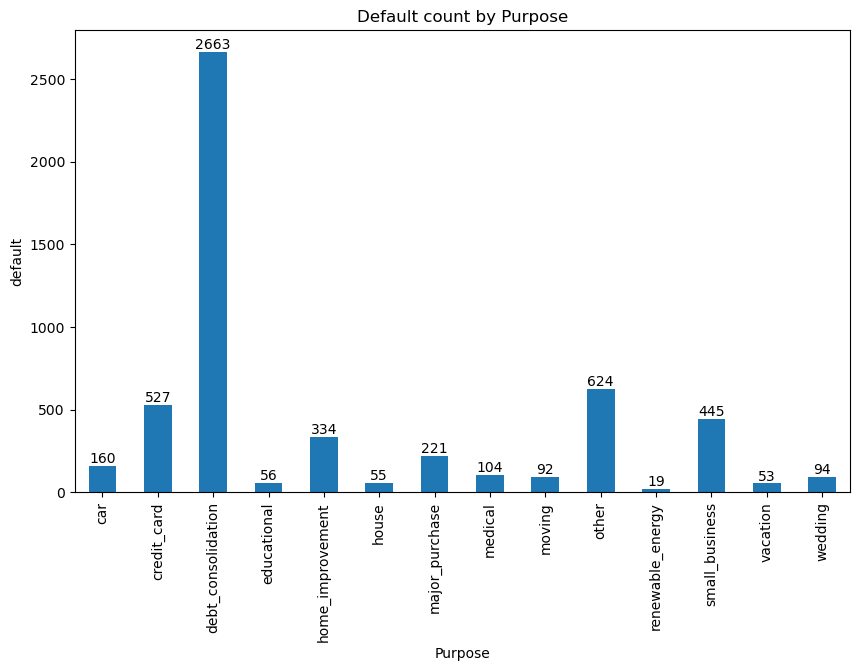

In [205]:
# Default Loans count by Purpose
# conclusion 1: Debt consolidation has highest number of defaults followed by Credit card ,Other, small business, home improvement

bar_plot_Group("purpose", "default","Purpose","default","Default count by Purpose")

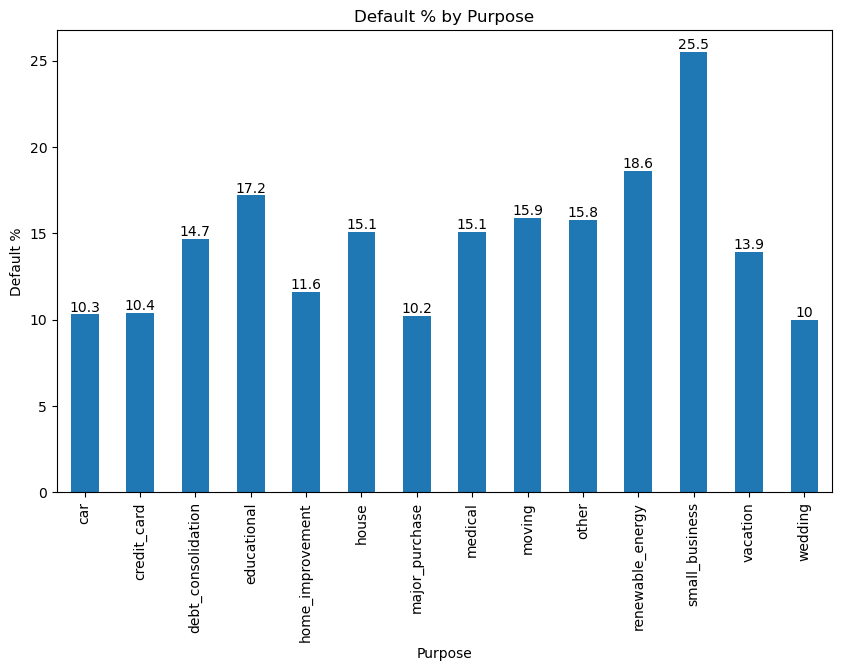

In [206]:
# Default % by Purpose
# conclusion 1: From Previous chart, based on Default Loans count, Debt consolidation has highest number of defaults 
#               followed by Credit card ,Other, small business, home improvement
# conclusion 2: Based on Default %, Small business has highest percentage of defaults followed by renewable energy and educational

default_by_category("purpose","Purpose","Default % by Purpose")

#### #2 Default Loans count by Term

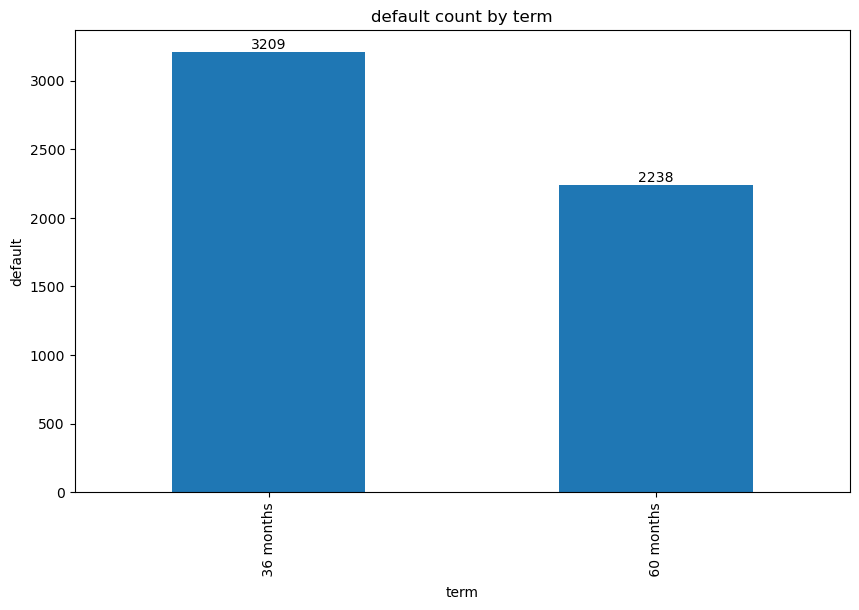

In [209]:
# Default Count by Term
# conclusion 1: Highest default count is for 36 month term

bar_plot_Group("term", "default","term","default","default count by term")

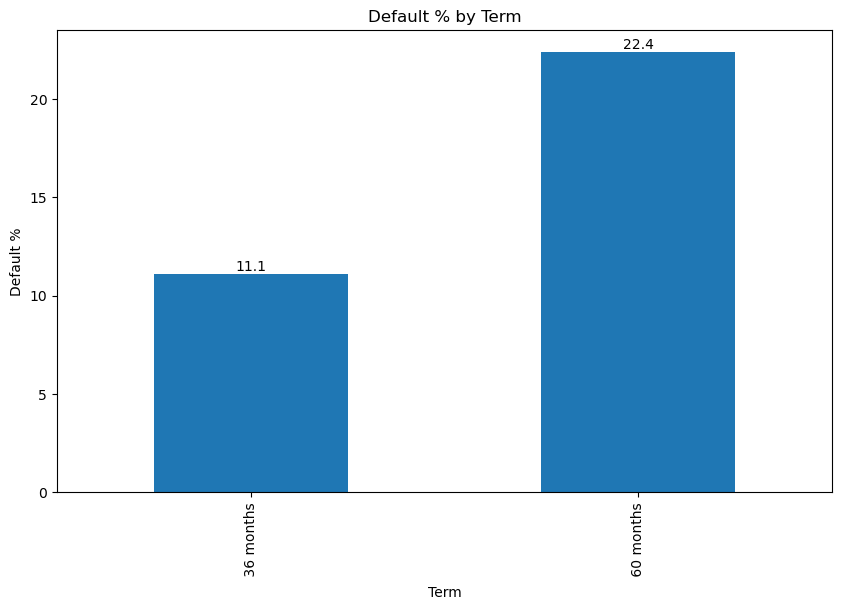

In [211]:
# Default% by Term
# conclusion 1: Highest default % is for 60 month term

default_by_category("term","Term","Default % by Term")

#### #3 Default Loans count by Grade

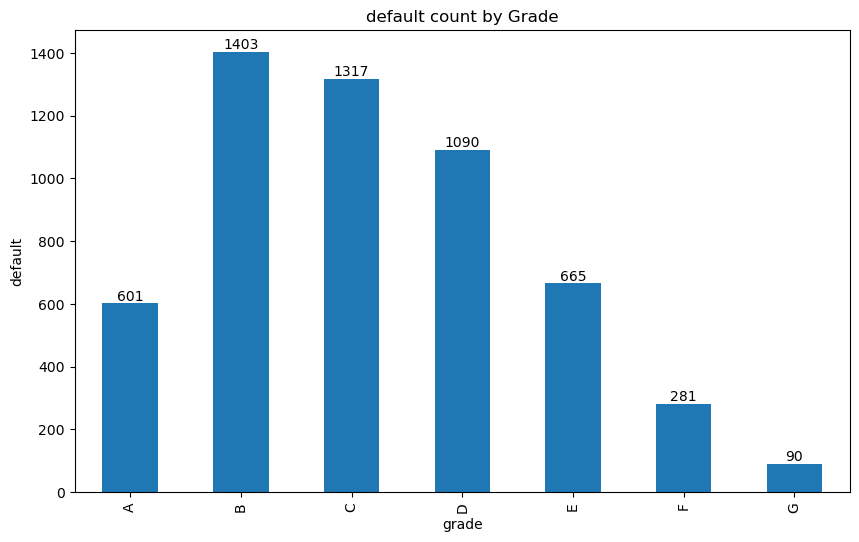

In [215]:
# Default Count by Grade
# conclusion 1: Highest default count is for Grade B

bar_plot_Group("grade", "default","grade","default","default count by Grade")

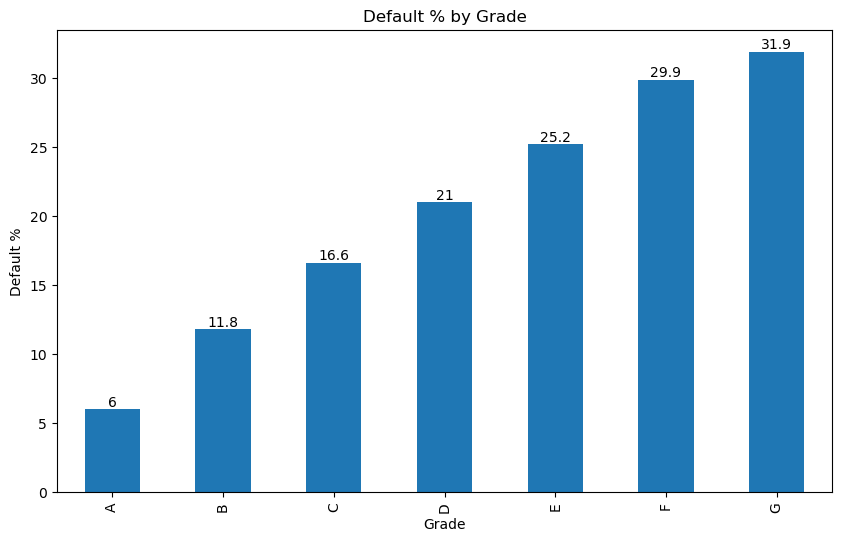

In [216]:
# Default Percentage by Grade
# conclusion 1: Highest default % is for Grade G


default_by_category("grade","Grade","Default % by Grade")

#### #4 Default Loans count by Interest Rate

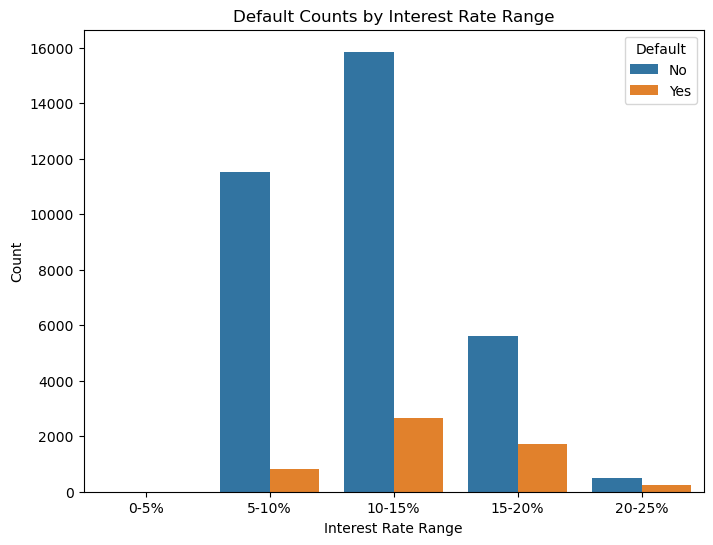

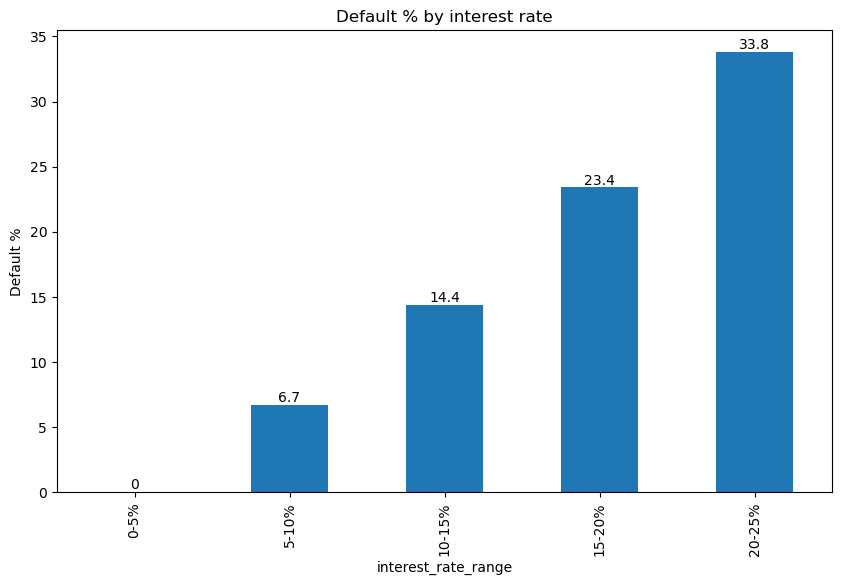

In [220]:
# Default Loans % by Interest rate
# conclusion 1: Highest number of Default loans % are for "verified"

bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5%', '5-10%', '10-15%', '15-20%','20-25%']
df4['interest_rate_range'] = pd.cut(df4['int_rate'], bins=bins, labels=labels)

# Countplot showing default status across interest rate ranges
plt.figure(figsize=(8, 6))
sns.countplot(x='interest_rate_range', hue='default', data=df4)
plt.title('Default Counts by Interest Rate Range')
plt.xlabel('Interest Rate Range')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()

# Default % by Interest Rate
# conclusion 1: From Previous chart, based on Default Loans count, Debt consolidation has highest number of defaults 
#               followed by Credit card ,Other, small business, home improvement
# conclusion 2: Based on Default %, Small business has highest percentage of defaults followed by renewable energy and educational

default_by_category("interest_rate_range","interest_rate_range","Default % by interest rate")

#### #5 Default Loans count by Employement Length

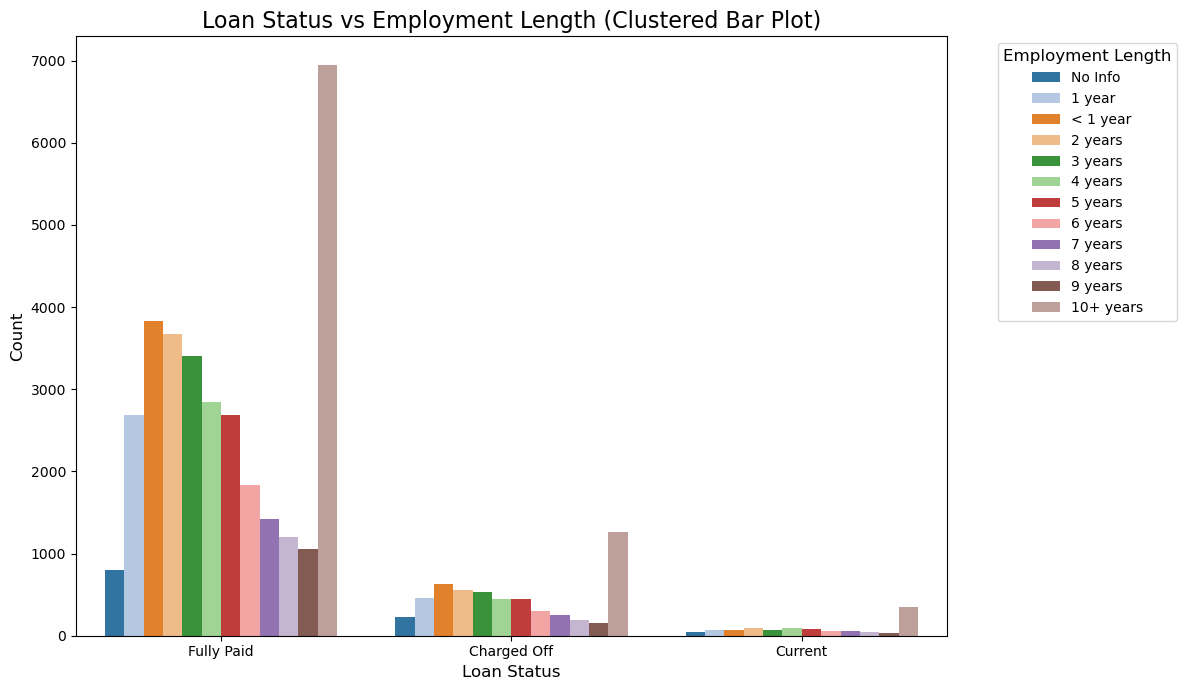

In [223]:
# Default Loans Count by Employment Length
# conclusion 1: Majority of the loans are Fully Paid

# Ensure `emp_length` categories are ordered (if they aren't already)
order = ['No Info','1 year','< 1 year','2 years' ,'3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
df4['emp_length'] = pd.Categorical(df4['emp_length'], categories=order, ordered=True)

# Define a custom color palette with enough distinct colors
custom_palette = sns.color_palette("tab20", len(order))  # "tab20" generates up to 20 distinct colors
hue_colors = dict(zip(order, custom_palette))  # Map each category to a unique color

# Plot with the updated palette
plt.figure(figsize=(12, 7))
sns.countplot(data=df4, x="loan_status", hue="emp_length", palette=hue_colors)
plt.title("Loan Status vs Employment Length (Clustered Bar Plot)", fontsize=16)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Employment Length", title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend adjustment
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

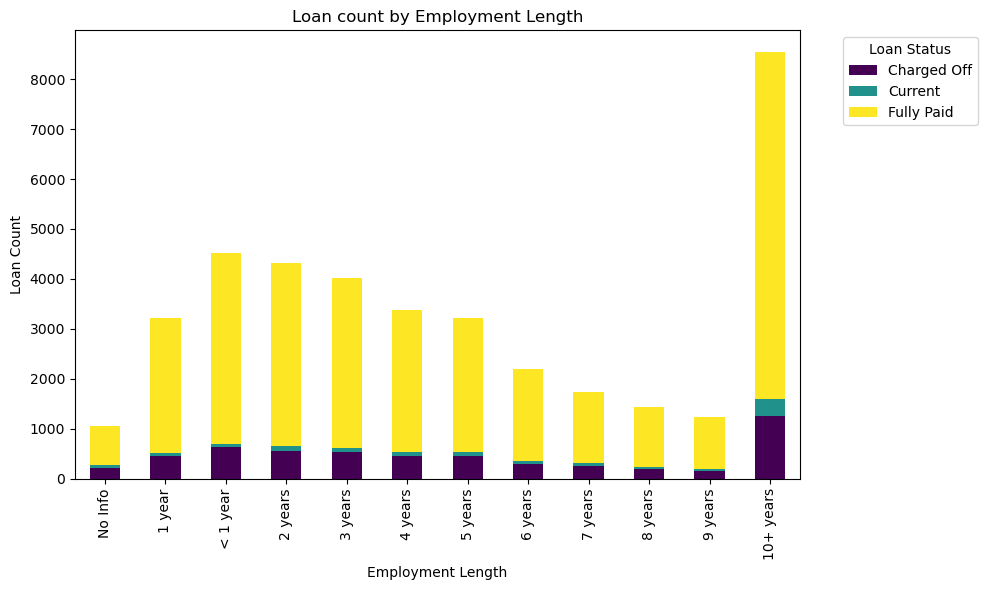

In [225]:
# Total Loans Count by Employment Length
# conclusion 1: Highest number of loans are for 10+ years employement length followed by '< 1 year'

# Creating a crosstab to get counts for loan_status and purpose
cross_tab = pd.crosstab(df4['emp_length'], df4['loan_status'])

# Plotting the stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Loan count by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Loan Count')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

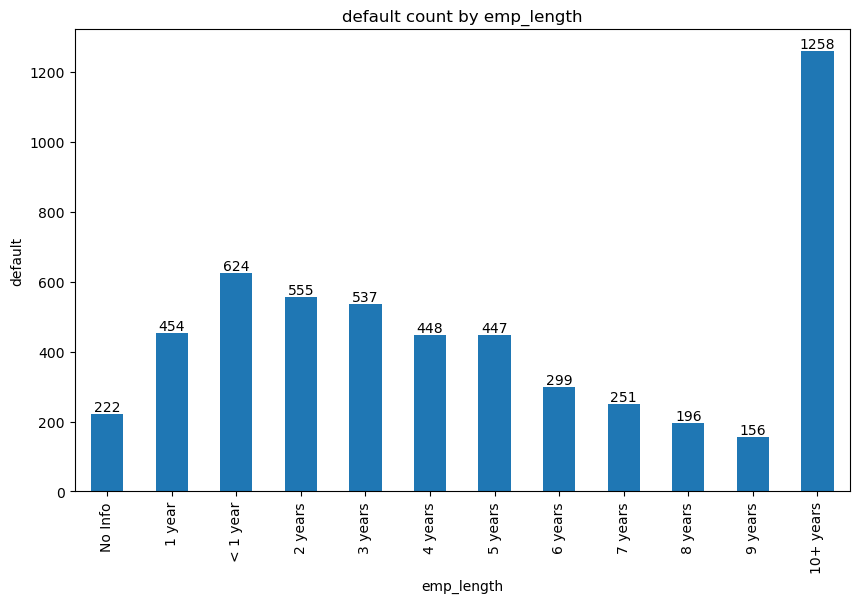

In [227]:
# Default Loans Count by Employment Length
# conclusion 1: Highest number of defaulted loans are for 10+ years employement length followed by '< 1 year'

bar_plot_Group("emp_length", "default","emp_length","default","default count by emp_length")

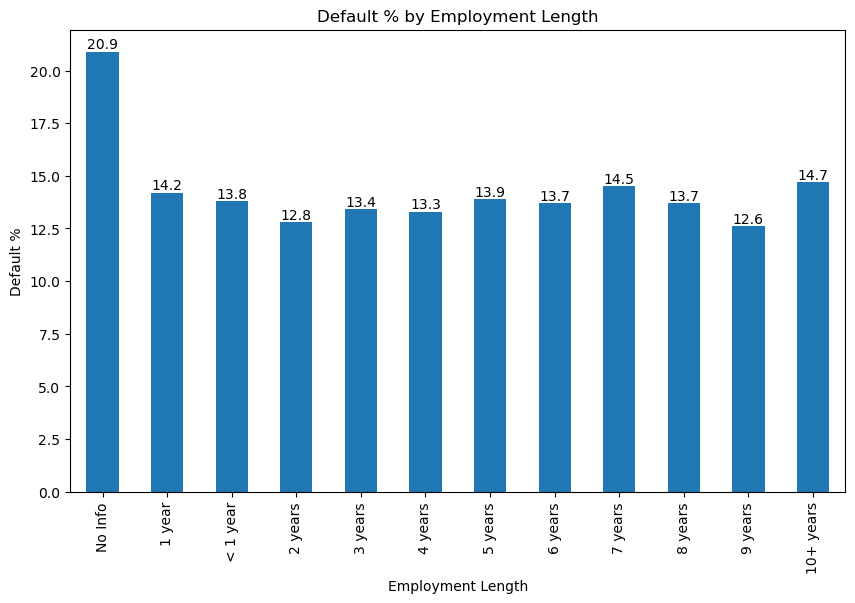

In [229]:
# Default % Loans by Employment Length
# conclusion 1: Highest number of defaulted loans percentage are for "No Info" followed by 10+ years employement length

default_by_category("emp_length","Employment Length","Default % by Employment Length")

#### #6 Default Loans count by Home Ownership

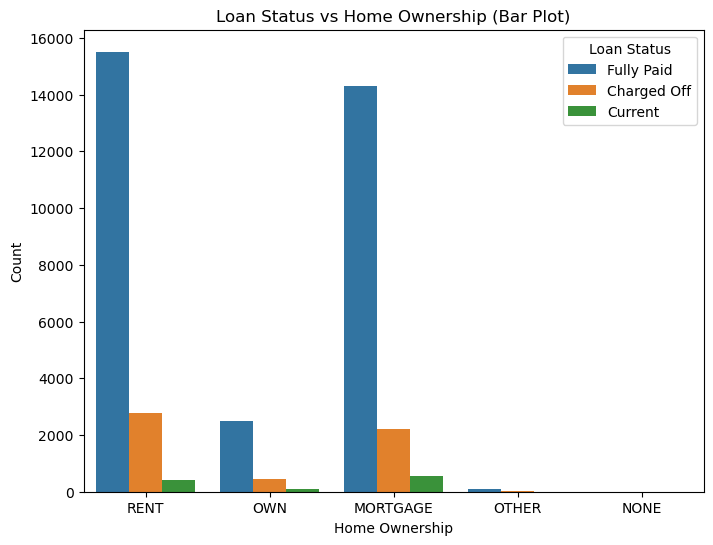

In [232]:
# Total Loans count by Home Ownership
# conclusion 1: Highest number of total loans count are for Rent followed by Mortgage

plt.figure(figsize=(8,6))
sns.countplot(x='home_ownership', hue='loan_status', data=df4)
plt.title('Loan Status vs Home Ownership (Bar Plot)')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

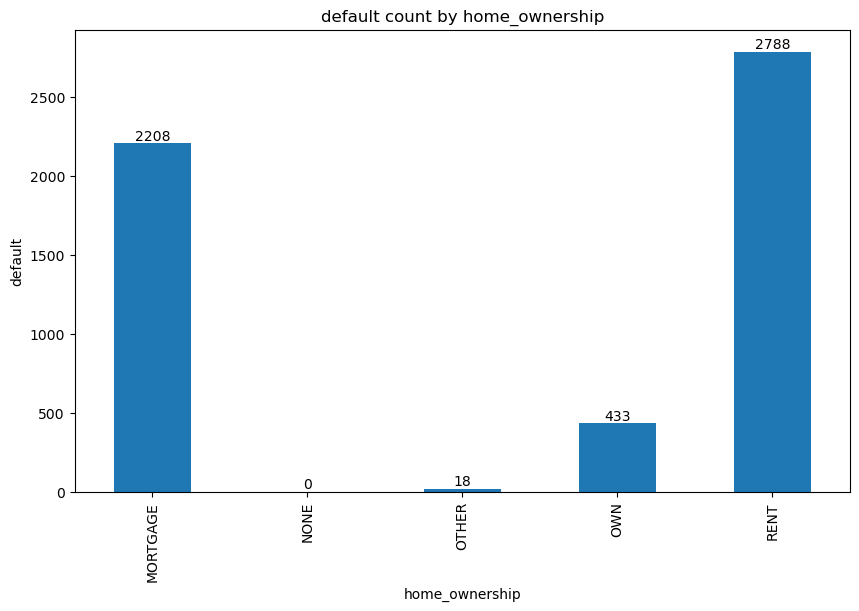

In [234]:
# Default Loans count by Home Ownership
# conclusion 1: Highest number of defaulted loans count are for Rent followed by Mortgage

bar_plot_Group("home_ownership", "default","home_ownership","default","default count by home_ownership")

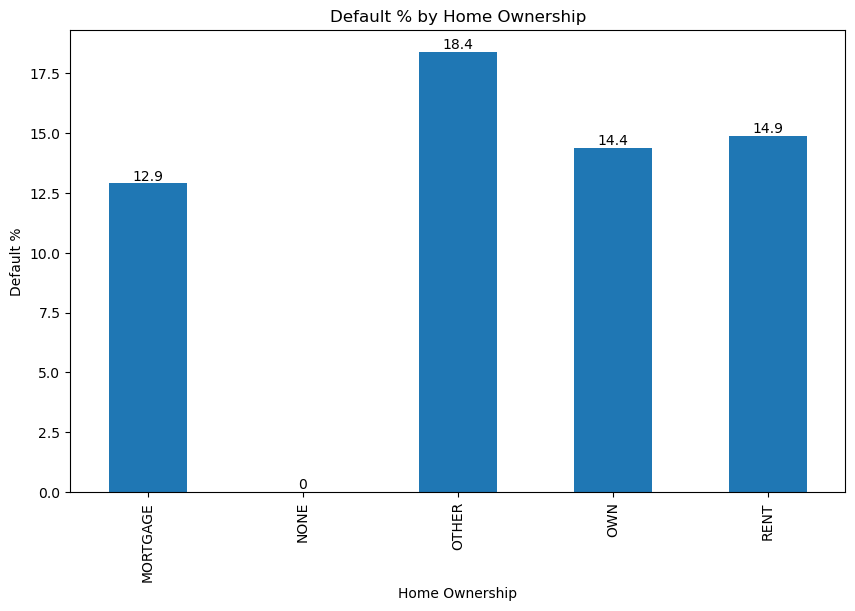

In [236]:
# Default Loans % by Home Ownership
# conclusion 1: Highest number of defaulted loans % are for OTHER followed by Rent

default_by_category("home_ownership","Home Ownership","Default % by Home Ownership")

#### #7 Default Loans count by Verification status

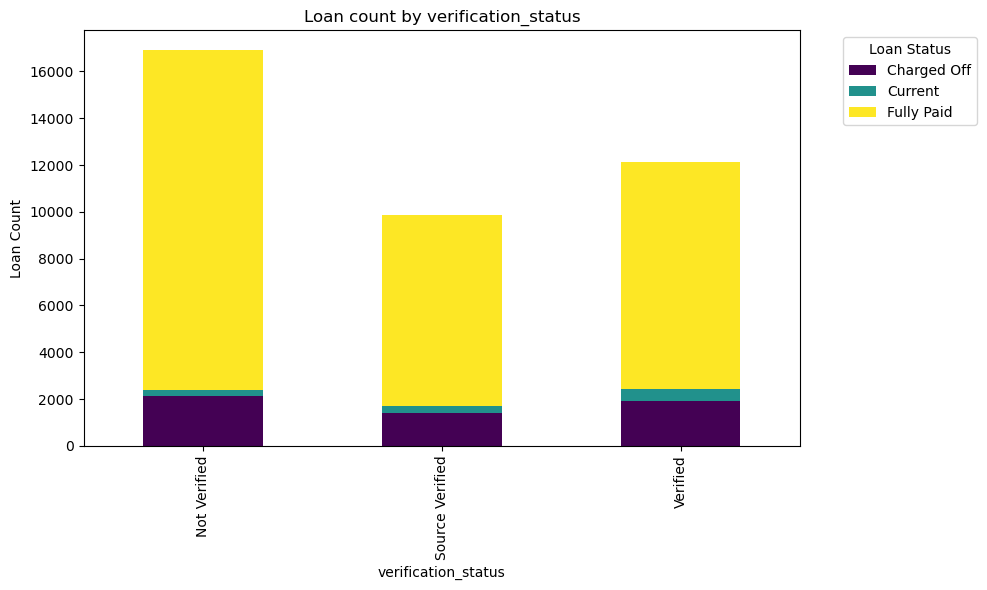

In [239]:
# Total Loans count by Verification status
# conclusion 1: Highest number of total loans count are for "not Verfied" status


# Creating a crosstab to get counts for loan_status and purpose
cross_tab = pd.crosstab(df4['verification_status'], df4['loan_status'])

# Plotting the stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Loan count by verification_status')
plt.xlabel('verification_status')
plt.ylabel('Loan Count')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

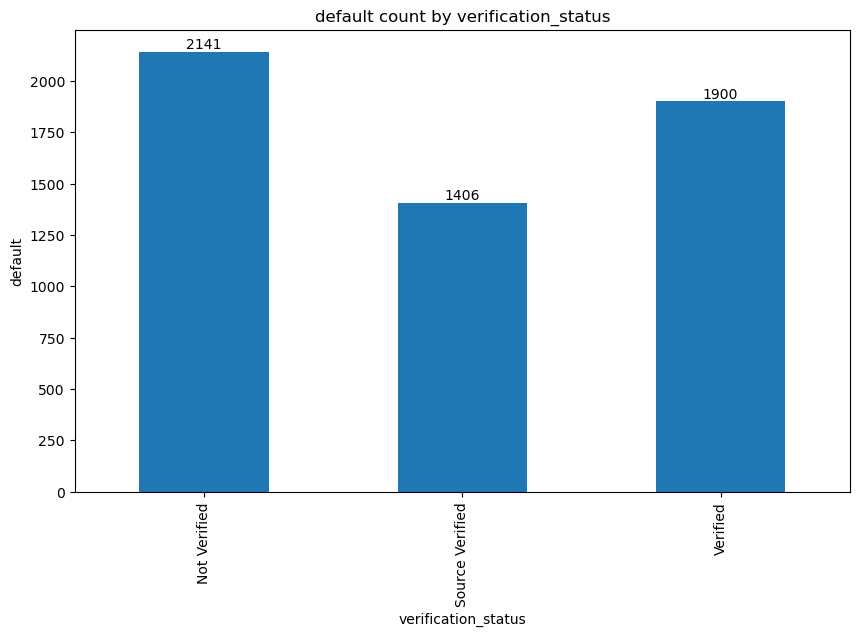

In [241]:
# Default Loans count by Verification status
# conclusion 1: Highest number of Default loans count are for "not Verfied" status followed by "verified"


bar_plot_Group("verification_status", "default","verification_status","default","default count by verification_status")


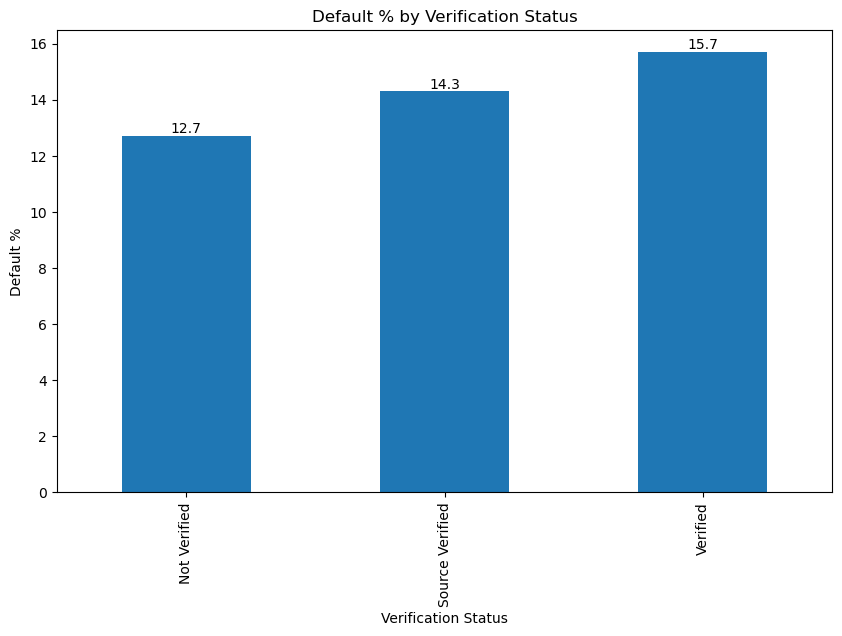

In [243]:
# Default Loans % by Verification status
# conclusion 1: Highest number of Default loans % are for "verified"


default_by_category("verification_status","Verification Status","Default % by Verification Status")

#### #8 Correlation Heat Map (Loan Amount, Interest Rate, Annual Income, dti, default)

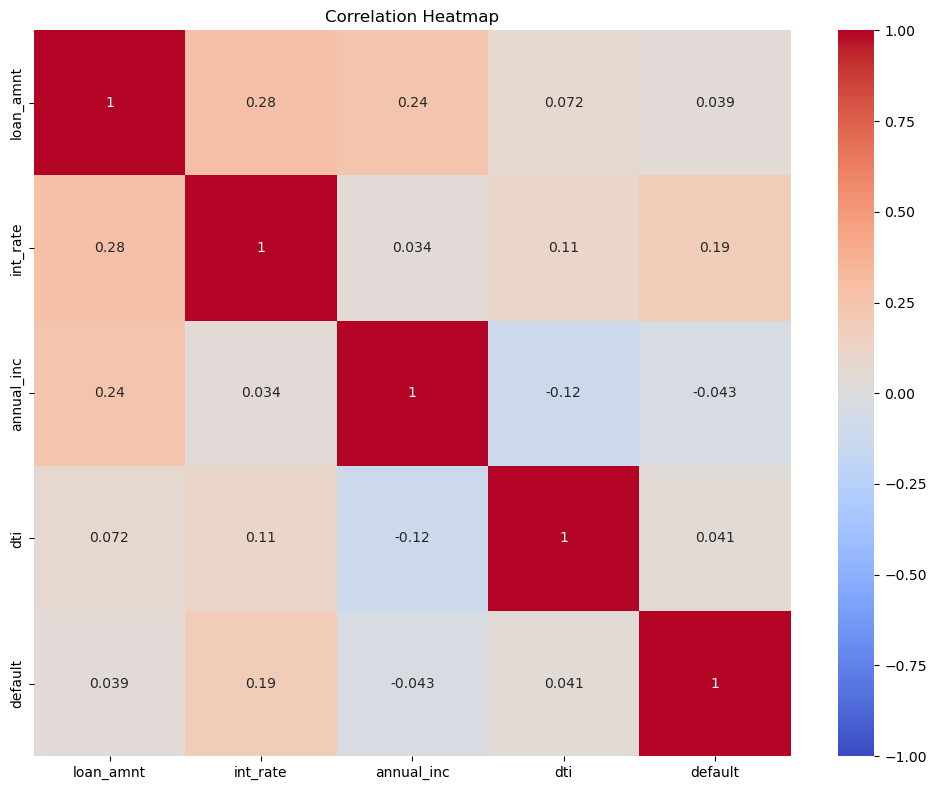

In [246]:
#Correlation Heatmap
#conclusion 1: None of the variables has strong correlation. 
#              however, interest rate and loan amount shows positive correlation
#                       interest rate and default shows positive correlation
#                       Interest rate and dti shows positive correlation
#                       annual income and loan amount shows positive correlation.

corr_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'default']
correlation = df4[corr_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Summarizing the most important results:
1. Default Percentage by Purpose:
    - Small business has highest percentage of defaults
    - Renewable energy has the second highest default rate
    - Educational has the third highest default rate
      
2. Default Percentage by Loan Grade:
   - Highest default rate is for 60 months Term
     
3. Default Rate by Grade:
   - Highest default rate is for  Grade G
   - Default % is increasing with increase in Grade
     
4. Default Rate by Interest Rate:Employment Length
   - Highest default rate is for  interest rate range 20%-25%
   - Default % is increasing with interest rate
     
5. Default Rate by Employment Length:
   - Highest number of defaulted loans percentage are for Employment Length not available (No Info)
       
6. Default Rate by Home Ownership:
    - Highest number of defaulted loans percentage are for “other” Home ownership
         
7. Default Rate by Verification Status:
    - Highest number of defaulted loans percentage are for “Verified” status
      
8. Correlation Heat Map (Loan Amount, Interest Rate, Annual Income, dti, default):
    - Interest rate and loan amount shows positive correlation
    - Interest rate and default shows positive correlation
    - Interest rate and dti shows positive correlation
    - Annual income and loan amount shows positive correlation.

**Key Insights:**

1. 14% of the loans are defaulted.
2. Average loan Amount is higher for defaulted loans.
3. Median loan Amount is slightly higher for defaulted loans.
4. Loans have increased significantly year over year.
5. Debt consolidation loans have increased year over year and highest in 2011. Credit card loans have also increased in 2011.
6. Highest number of loans are for Debt Consolidation, followed by Credit_card, Other and Home Improvement.
7. Based on the data available and analysis the top 5 driving factors (driver variables) which indicate if a person is likely to default are:
        1. Purpose
        2. Term
        3. Grade

        4. Interest Rate
        5. Employment Length
8.  Interest rate and loan amount shows positive correlation
9.  Interest rate and default shows positive correlation
10. Interest rate and dti shows positive correlation
11. Annual income and loan amount shows positive correlation 